In [1]:
from bhpwave.spline import CubicSpline, BicubicSpline
from bhpwave.trajectory.geodesic import kerr_isco_frequency, kerr_circ_geo_radius, kerr_circ_geo_orbital_frequency, kerr_isco_radius

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
mpl.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
mpl.rc('text', usetex=True)
mpl.rc('font', **{'size' : 14})

import os
# pathname = os.path.dirname(os.path.abspath(__file__))

OMEGA_MIN = 2.e-3
A_MAX = 0.9999

def alpha_of_a_omega(a, omega):
    oISCO = kerr_isco_frequency(a)
    return alpha_of_omega_ISCO(omega, oISCO)

def alpha_of_omega_ISCO(omega, oISCO):
    return (abs(oISCO**(1./3.) - omega**(1./3.))/(oISCO**(1./3.) - OMEGA_MIN**(1./3.)))**(0.5)

def omega_of_a_alpha(a, alpha):
    oISCO = kerr_isco_frequency(a)
    return omega_of_alpha_ISCO(alpha, oISCO)

def omega_of_alpha_ISCO(alpha, oISCO):
    return pow(pow(oISCO, 1./3.) - pow(alpha, 2.)*(pow(oISCO, 1./3.) - pow(OMEGA_MIN, 1./3.)), 3.)

def chi_of_spin_subfunc(a):
    return pow(1. - a, 1./3.)

def chi_of_spin(a):
    return pow((chi_of_spin_subfunc(a) - chi_of_spin_subfunc(A_MAX))/(chi_of_spin_subfunc(-A_MAX) - chi_of_spin_subfunc(A_MAX)), 0.5)

def spin_of_chi(chi):
    return 1. - pow(chi_of_spin_subfunc(A_MAX) + pow(chi, 2.)*(chi_of_spin_subfunc(-A_MAX) - chi_of_spin_subfunc(A_MAX)), 3.)

def a_omega_to_chi_alpha(a, omega):
    chi = chi_of_spin(a)
    alpha = alpha_of_a_omega(a, omega)
    return (chi, alpha)

traj = np.loadtxt("../data/trajectory.txt", skiprows=3)
trajHeader = np.loadtxt("../data/trajectory.txt", skiprows=2, max_rows=1, dtype='str')
trajShape = np.loadtxt("../data/trajectory.txt", skiprows=1, max_rows=1, dtype='int')

phaseData = np.ascontiguousarray(traj[:, 4].reshape(trajShape))
timeData = np.ascontiguousarray(traj[:, 3].reshape(trajShape))
fluxData = np.ascontiguousarray(traj[:, 2].reshape(trajShape))
betaData = np.ascontiguousarray(traj[:, 0].reshape(trajShape)[:, 0])
alphaData = np.ascontiguousarray(traj[:, 1].reshape(trajShape)[0])

Edot = BicubicSpline(betaData, alphaData, fluxData)
PhiCheck = BicubicSpline(betaData, alphaData, phaseData)
TCheck = BicubicSpline(betaData, alphaData, timeData)

downsample_rate = 4
Nb = int((betaData.shape[0] - 1)/downsample_rate + 1)
Na = int((alphaData.shape[0] - 1)/downsample_rate + 1)
flux_samples = np.zeros((Nb, Na, 5))
phase_samples = np.zeros((Nb, Na, 5))
time_samples = np.zeros((Nb, Na, 5))
for i in range(Nb):
    for j in range(Na):
        beta = betaData[downsample_rate*i]
        alpha = alphaData[downsample_rate*j]
        atemp = spin_of_chi(beta)
        otemp = omega_of_a_alpha(atemp, alpha)
        EdotData = Edot(beta, alpha)
        PData = PhiCheck(beta, alpha)
        TData = TCheck(beta, alpha)
        flux_samples[i, j] = [atemp, otemp, EdotData, alpha, beta]
        phase_samples[i, j] = [atemp, otemp, PData, alpha, beta]
        time_samples[i, j] = [atemp, otemp, TData, alpha, beta]

cmap_temp = mpl.colormaps['plasma'].resampled(80)
alist = [0, 14, 20, 25, 29, 32]

In [2]:
from scipy.interpolate import interp1d
bc_test = 'not-a-knot'

test_my = CubicSpline(alphaData, fluxData[4], bc = bc_test)
test_py = interp1d(alphaData, fluxData[4], kind='cubic')

test_my_downsample = CubicSpline(np.ascontiguousarray(alphaData[::2]), np.ascontiguousarray(fluxData[4, ::2]), bc = bc_test)
test_py_downsample = interp1d(alphaData[::2], fluxData[4, ::2], kind='cubic')

In [3]:
test_my(alphaData)-fluxData[4]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [4]:
alphaJs = np.linspace(0.01, 0.99, 502)[1:-1]
error_test=np.array([abs(1-test_my(alphaJ)/test_py(alphaJ)) for alphaJ in alphaJs])
error_test[error_test==0.]=1.e-16
error_test_2=np.array([abs(1-test_py_downsample(alphaJ)/test_py(alphaJ)) for alphaJ in alphaJs])
error_test_2[error_test_2==0.]=1.e-16
error_test_3=np.array([abs(1-test_my_downsample(alphaJ)/test_my(alphaJ)) for alphaJ in alphaJs])
error_test_3[error_test_3==0.]=1.e-16

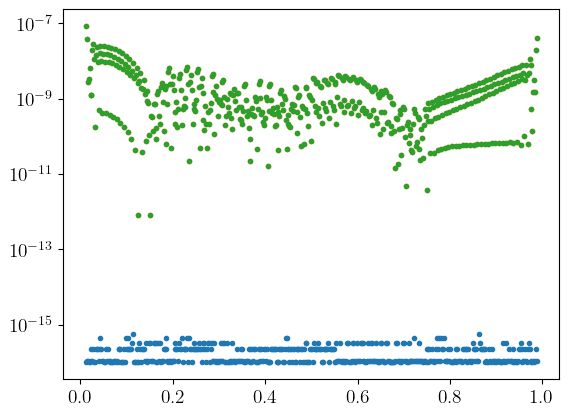

In [5]:
plt.plot(alphaJs, error_test, '.')
plt.plot(alphaJs, error_test_2, '.')
plt.plot(alphaJs, error_test_3, '.')
plt.yscale('log')
plt.show()

In [9]:
from scipy.integrate import solve_ivp

def omega_alpha_derivative(omega, oISCO):
    if abs(oISCO - omega) < 1.e-13: 
        return 0.
    return -6.*pow((pow(oISCO, 1./3.) - pow(OMEGA_MIN, 1./3.))*(pow(oISCO, 1./3.) - pow(omega, 1./3.)), 0.5)*pow(omega, 2./3.)

def energy_omega_derivative(a, omega):
    r = kerr_circ_geo_radius(a, omega)
    return energy_r_derivative(a, r)*r_omega_derivative(a, omega)

def energy_r_derivative(a, r):
    v = 1./np.sqrt(r)
    return 0.5*(pow(v, 4) - 6.*pow(v, 6) + 8.*a*pow(v, 7) - 3.*a*a*pow(v, 8))/pow(1. + v*v*(2.*a*v - 3.), 1.5)

def r_omega_derivative(a, omega):
    return -2./(3.*pow(omega, 5./3.)*pow(1. - a*omega, 1./3.))

t_data = np.zeros(fluxData.shape)
phi_data = np.zeros(fluxData.shape)

for i in range(betaData.shape[0]):
    iterChi = i
    flux_spline = CubicSpline(alphaData, fluxData[iterChi])
    a_val = spin_of_chi(betaData[iterChi])
    oISCO_val = kerr_isco_frequency(a_val)

    def dIdAlphaIntegrate(alpha, t):
        omega = omega_of_a_alpha(a_val, alpha)
        dOmega_dAlpha = omega_alpha_derivative(omega, oISCO_val)
        dE_dOmega = energy_omega_derivative(a_val, omega)
        Edot = flux_spline(alpha)*32./5.*(omega)**(10./3.)
        return dE_dOmega*dOmega_dAlpha/Edot*np.array([1., omega])
    
    insp = solve_ivp(dIdAlphaIntegrate, [0., 1.], [0., 0.], method='DOP853', t_eval=alphaData, rtol=1.e-13, atol=1.e-14)
    t_data[i] = insp.y[0]
    phi_data[i] = insp.y[1]

In [77]:
kerr_isco_radius(0.9)

2.320883041761887

## Compare with Scott's data

In [11]:
import os 
bhptoolkit_file_location = "https://raw.githubusercontent.com/BlackHolePerturbationToolkit/CircularOrbitSelfForceData/master/Kerr/Fluxes/Flux_Edot_a"
aval_strings = ["-0.99", "-0.8", "-0.5", "0.1", "0.6", "0.9", "0.995", "0.999"]
for aval in aval_strings:
    file_check = "Flux_Edot_a" + aval + ".dat"
    wget_string = "wget " + bhptoolkit_file_location + aval + ".dat"
    print(file_check)
    if not os.path.isfile(file_check):
        os.system(wget_string)

Flux_Edot_a-0.99.dat
Flux_Edot_a-0.8.dat
Flux_Edot_a-0.5.dat
Flux_Edot_a0.1.dat
Flux_Edot_a0.6.dat
Flux_Edot_a0.9.dat
Flux_Edot_a0.995.dat
Flux_Edot_a0.999.dat


In [12]:
EdotDataComp=np.load("/Users/znasipak/Documents/Projects/EccentricFluxes/data/bhpwave_edot_redo.npy")

In [14]:
alphaa, aa = np.meshgrid(alphaData, spin_of_chi(betaData))
omegaa = omega_of_a_alpha(aa, alphaa)

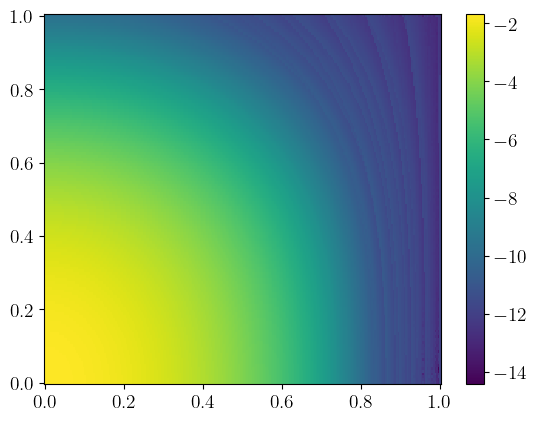

In [15]:
plt.pcolormesh(alphaData, betaData, np.log10(np.abs(1 - fluxData*32./5.*omegaa**(10./3.)/(2*EdotDataComp))))
plt.colorbar()
plt.show()

In [16]:
spl=BicubicSpline(np.linspace(0, 1, 129), np.linspace(0, 1, 257), 2.*EdotDataComp/(32./5.*omegaa**(10./3.)))
spl2=BicubicSpline(np.linspace(0, 1, 129), np.linspace(0, 1, 257), fluxData)

In [17]:
def scaled_energy_flux(a, r0):
    omega = kerr_circ_geo_orbital_frequency(a, r0)
    alpha = alpha_of_a_omega(a, omega)
    chi = chi_of_spin(a)
    return spl(chi, alpha)*32./5.*omega**(10./3.)

In [18]:
def chi_alpha_pair(a, r0):
    omega = kerr_circ_geo_orbital_frequency(a, r0)
    alpha = alpha_of_a_omega(a, omega)
    chi = chi_of_spin(a)
    return (chi, alpha)

def a_r0_pair(chi, alpha):
    a = spin_of_chi(chi)
    omega = omega_of_a_alpha(a, alpha)
    r0 = kerr_circ_geo_radius(a, omega)
    return (a, r0)


In [19]:
chi_alpha_pair(-0.8, 10.)

(0.9819297621148101, 0.3629654664816835)

In [20]:
2.*EdotDataComp[-3, 93]

7.42749139892839e-05

In [21]:
a_r0_pair(np.linspace(0, 1, 129)[-3], np.linspace(0, 1, 257)[93])

(-0.8260249778395352, 10.086365464462675)

In [22]:
flux_file_list = ["Flux_Edot_a0.999.dat", 
                  "Flux_Edot_a0.995.dat", 
                  "Flux_Edot_a0.9.dat", 
                  "Flux_Edot_a0.6.dat", 
                  "Flux_Edot_a0.1.dat", 
                  "Flux_Edot_a-0.5.dat",
                  "Flux_Edot_a-0.8.dat",
                  "Flux_Edot_a-0.99.dat"]
flux_spin_list = [0.999, 0.995, 0.9, 0.6, 0.1, -0.5, -0.8, -0.99]

In [32]:
testData = []
for file, spin in zip(flux_file_list, flux_spin_list):
    tempData = np.loadtxt(file)
    tempData = tempData[tempData[:,0] < 62.]
    testData.append([spin, tempData])

In [24]:
testA = testData[-1][1]
scaled_energy_flux(-0.99, 9.306802158062), 3.2503554425183156e-07, testA[testA[:,0]==9.306802158062][0,1] + testA[testA[:,0]==9.306802158062][0,2]

(0.00012461511983701963, 3.2503554425183156e-07, 0.00012461511978021793)

In [25]:
abs(1-scaled_energy_flux(-0.99, 9.306802158062)/0.00012461511978021793)

4.558171617929929e-10

In [37]:
comparisons = []
comparisons2 = []
for data in testData:
    a = data[0]
    compData = data[1]
    r_vals = compData[:, 0]
    flux_vals = compData[:, 1] + compData[:, 2]
    flux_comparison = np.zeros((r_vals.shape[0]))
    for i in range(flux_comparison.shape[0]):
        flux_comparison[i] = scaled_energy_flux(a, r_vals[i])
    comparisons.append([r_vals, np.abs(1. - flux_comparison/flux_vals)])
    comparisons2.append([r_vals, np.abs(flux_comparison-flux_vals)])

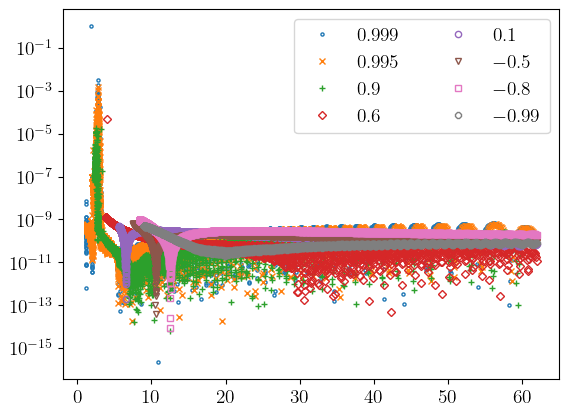

In [38]:
markers = ['.', 'x', '+', 'D', 'o', 'v', 's', '8']
for i, comparison in enumerate(comparisons):
    plt.plot(comparison[0][::2], comparison[1][::2], markers[i], label="$"+str(flux_spin_list[i])+"$", markersize = 4.5, fillstyle='none')
plt.yscale('log')
plt.legend(loc="upper right", ncol=2)
plt.show()

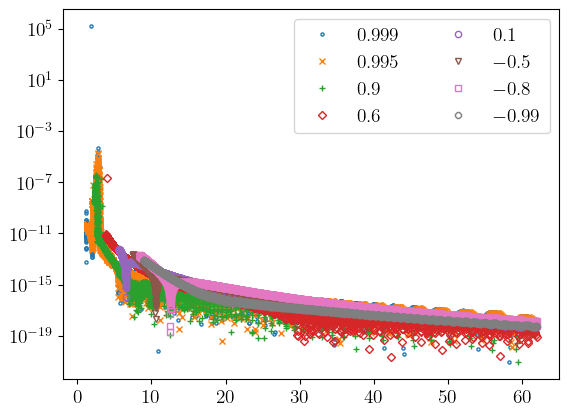

In [39]:
markers = ['.', 'x', '+', 'D', 'o', 'v', 's', '8']
for i, comparison in enumerate(comparisons2):
    plt.plot(comparison[0][::2], comparison[1][::2], markers[i], label="$"+str(flux_spin_list[i])+"$", markersize = 4.5, fillstyle='none')
plt.yscale('log')
plt.legend(loc="upper right", ncol=2)
plt.show()

In [48]:
testData2 = []
for file, spin in zip(flux_file_list[:4], flux_spin_list[:4]):
    tempData = np.loadtxt(file)
    tempData = tempData[tempData[:,0] < 5.]
    testData2.append([spin, tempData])

In [49]:
comparisons3 = []
for data in testData2:
    a = data[0]
    compData = data[1]
    r_vals = compData[:, 0]
    flux_vals = compData[:, 1] + compData[:, 2]
    flux_comparison = np.zeros((r_vals.shape[0]))
    for i in range(flux_comparison.shape[0]):
        flux_comparison[i] = scaled_energy_flux(a, r_vals[i])
    comparisons3.append([r_vals, np.abs(1. - flux_comparison/flux_vals)])

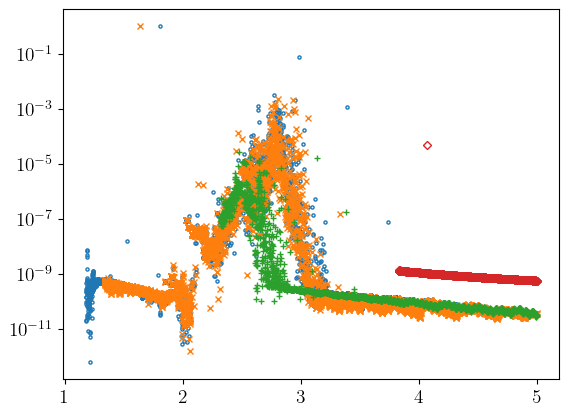

In [51]:
markers = ['.', 'x', '+', 'D', 'o', 'v', 's', '8']
for i, comparison in enumerate(comparisons3):
    plt.plot(comparison[0], comparison[1], markers[i], label="$"+str(flux_spin_list[i])+"$", markersize = 4.5, fillstyle='none')
plt.yscale('log')
# plt.legend(loc="upper right")
plt.show()

In [54]:
foobar=comparisons3[-1][1]

In [61]:
comparisons3[-1][0][foobar>1.e-5][0]

4.068118383836

In [62]:
0.004519093767180723-0.0000210284321668016

0.004498065335013921

In [76]:
1-scaled_energy_flux(0.99, 2.5)

-7.04584168786937e-10

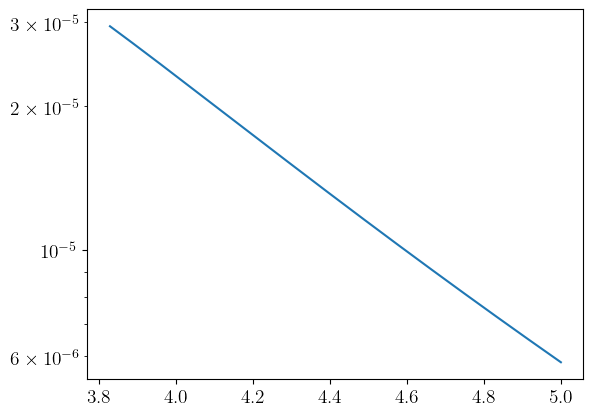

In [73]:
# plt.plot(testData2[-1][1][:, 0], testData2[-1][1][:, 1])
plt.plot(testData2[-1][1][:, 0], np.abs(testData2[-1][1][:, 2]))
plt.yscale('log')
plt.show()